In [111]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Load the dataset
df = pd.read_csv("water_params_analysis_6.csv")
df

,Tanggal,P,Wf,Wl
0,01-11-2023,0.00,0.050000,0.500000
1,02-11-2023,0.00,0.050000,0.500000
2,03-11-2023,0.00,0.050000,0.500000
3,04-11-2023,0.00,0.050000,0.500000
4,05-11-2023,18.70,1.736681,0.699467
...,...,...,...,...
177,26-04-2024,10.65,1.263725,0.777333
178,27-04-2024,4.25,1.435640,0.800000
179,28-04-2024,0.00,0.447337,0.800000
180,29-04-2024,0.00,0.050000,0.779200


In [113]:
# Define input (antecedent) and output (consequent) variables
level = ctrl.Antecedent(np.arange(0, 151, 1), 'level')
flow = ctrl.Antecedent(np.arange(0, 372, 1), 'flow')
gate = ctrl.Consequent(np.arange(0, 101, 1), 'gate')

In [114]:
# Define membership functions for 'level'
level['vlw'] = fuzz.trimf(level.universe, [-31.46, 0, 31.46])
level['lw'] = fuzz.trimf(level.universe, [6.29, 37.75, 69.21])
level['med'] = fuzz.trimf(level.universe, [44.04, 75.5, 106.96])
level['hg'] = fuzz.trimf(level.universe, [81.79, 113.25, 144.71])
level['vhg'] = fuzz.trimf(level.universe, [119.54, 151, 182.46])

In [115]:
# Define membership functions for 'flow'
flow['vsl'] = fuzz.trimf(flow.universe, [-77.29, 0, 77.29])
flow['sl'] = fuzz.trimf(flow.universe, [15.46, 92.75, 170.04])
flow['mid'] = fuzz.trimf(flow.universe, [108.21, 185.5, 262.79])
flow['fs'] = fuzz.trimf(flow.universe, [200.96, 278.25, 355.54])
flow['vfs'] = fuzz.trimf(flow.universe, [293.71, 371, 448.29])

In [116]:
# Define membership functions for 'gate'
gate['vnr'] = fuzz.trimf(gate.universe, [-21.04, 0, 21.04])
gate['nr'] = fuzz.trimf(gate.universe, [4.21, 25.25, 46.29])
gate['avg'] = fuzz.trimf(gate.universe, [29.46, 50.5, 71.54])
gate['wd'] = fuzz.trimf(gate.universe, [54.71, 75.75, 96.79])
gate['vwd'] = fuzz.trimf(gate.universe, [79.96, 101, 122.04])

c:\Applications\Anaconda3\envs\fuzzy_nfs\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


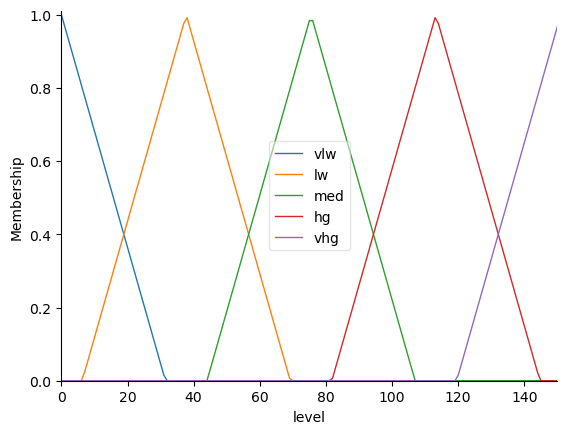

In [117]:
level.view()

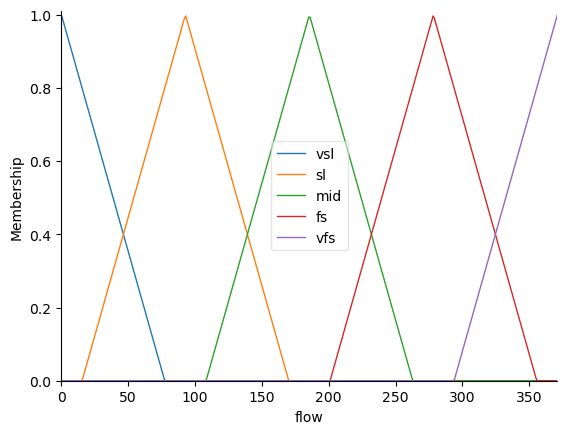

In [118]:
flow.view()

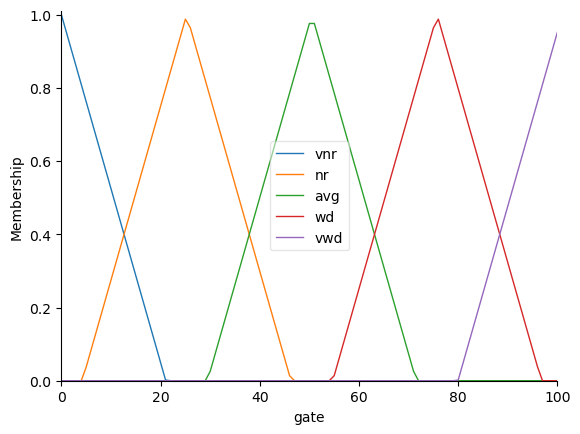

In [119]:
gate.view()

In [120]:
# Define the rules based on the MATLAB rule base
rules = [
    ctrl.Rule(level['vlw'] & flow['vsl'], gate['vnr']),
    ctrl.Rule(level['lw'] & flow['vsl'], gate['vnr']),
    ctrl.Rule(level['med'] & flow['vsl'], gate['vnr']),
    ctrl.Rule(level['hg'] & flow['vsl'], gate['nr']),
    ctrl.Rule(level['vhg'] & flow['vsl'], gate['avg']),

    ctrl.Rule(level['vlw'] & flow['sl'], gate['vnr']),
    ctrl.Rule(level['lw'] & flow['sl'], gate['vnr']),
    ctrl.Rule(level['med'] & flow['sl'], gate['nr']),
    ctrl.Rule(level['hg'] & flow['sl'], gate['avg']),
    ctrl.Rule(level['vhg'] & flow['sl'], gate['wd']),

    ctrl.Rule(level['vlw'] & flow['mid'], gate['vnr']),
    ctrl.Rule(level['lw'] & flow['mid'], gate['nr']),
    ctrl.Rule(level['med'] & flow['mid'], gate['avg']),
    ctrl.Rule(level['hg'] & flow['mid'], gate['wd']),
    ctrl.Rule(level['vhg'] & flow['mid'], gate['vwd']),

    ctrl.Rule(level['vlw'] & flow['fs'], gate['nr']),
    ctrl.Rule(level['lw'] & flow['fs'], gate['avg']),
    ctrl.Rule(level['med'] & flow['fs'], gate['wd']),
    ctrl.Rule(level['hg'] & flow['fs'], gate['vwd']),
    ctrl.Rule(level['vhg'] & flow['fs'], gate['vwd']),

    ctrl.Rule(level['vlw'] & flow['vfs'], gate['avg']),
    ctrl.Rule(level['lw'] & flow['vfs'], gate['wd']),
    ctrl.Rule(level['med'] & flow['vfs'], gate['vwd']),
    ctrl.Rule(level['hg'] & flow['vfs'], gate['vwd']),
    ctrl.Rule(level['vhg'] & flow['vfs'], gate['vwd'])
]

In [121]:
# Create control system and simulation
gate_ctrl = ctrl.ControlSystem(rules)
gate_sim = ctrl.ControlSystemSimulation(gate_ctrl)

In [122]:
# Compute gate for each row
gate_outputs = []
for i, row in df.iterrows():
    try:
        gate_sim.input['level'] = row['Wl'] * 100  # scale normalized Wl
        gate_sim.input['flow'] = row['Wf'] * 10  # scale normalized Wf
        gate_sim.compute()
        gate_outputs.append(gate_sim.output['gate'])
    except:
        gate_outputs.append(np.nan)


In [123]:
# Add to DataFrame
df['Gate'] = gate_outputs
df

,Tanggal,P,Wf,Wl,Gate
0,01-11-2023,0.00,0.050000,0.500000,7.780065
1,02-11-2023,0.00,0.050000,0.500000,7.780065
2,03-11-2023,0.00,0.050000,0.500000,7.780065
3,04-11-2023,0.00,0.050000,0.500000,7.780065
4,05-11-2023,18.70,1.736681,0.699467,8.858604
...,...,...,...,...,...
177,26-04-2024,10.65,1.263725,0.777333,7.175741
178,27-04-2024,4.25,1.435640,0.800000,7.218672
179,28-04-2024,0.00,0.447337,0.800000,7.140128
180,29-04-2024,0.00,0.050000,0.779200,7.053115


In [124]:
# Export to CSV
df.to_csv("skfuzzy4_mamdani_type1.1.csv", index=False)
print("skfuzzy4_mamdani_type1.1.csv")

skfuzzy4_mamdani_type1.1.csv


In [ ]:
# For demonstration, set input values (optional)
level_input = 0.699467
flow_input = 1.736681

# Create a new simulation instance (recommended for reuse)
gate_sim = ctrl.ControlSystemSimulation(gate_ctrl)

gate_sim.input['level'] = level_input*100
gate_sim.input['flow'] = flow_input*10

In [126]:
# Compute the output
gate_sim.compute()
gate_sim.output['gate']

50.5